<a href="https://colab.research.google.com/github/AmrHassanKhalaf/AmrHassanKhalaf/blob/main/Sec_8/Task_1/Sec_8_T_1_NTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.datasets import fetch_20newsgroups

In [43]:
import pandas as pd

In [44]:
categories = [
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'soc.religion.christian',
]

In [45]:
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
data = {'text': dataset.data, 'target': dataset.target}
df = pd.DataFrame(data)

In [46]:
df.head()

,text,target
0,\n >>So good that there isn't any diff wheth...,0
1,\n\nWell I don't see any smileys here. I am t...,1
2,\n\nI haven't heard any news about ASN carryin...,1
3,"well, the subject says just about all I intend...",0
4,\n Just a quick question. If Mary was Immacu...,2


In [47]:
import re

In [48]:
# cleaning
def preprocess(text):
    text = str(text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df["clean_text"] = df["text"].apply(preprocess)



In [49]:
df.drop(["text"], axis=1, inplace=True)

In [50]:
df.head()

,target,clean_text
0,0,So good that there isn t any diff whether or n...
1,1,Well I don t see any smileys here I am trying ...
2,1,I haven t heard any news about ASN carrying an...
3,0,well the subject says just about all I intende...
4,2,Just a quick question If Mary was Immaculately...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf=TfidfVectorizer(max_df=.6,min_df=.05,ngram_range=(1,3))

In [53]:
x=tfidf.fit_transform(df["clean_text"])
x.shape

(1790, 337)

In [54]:
#truncatedsvd
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=250)
x_tsvd=tsvd.fit_transform(x)
tsvd.explained_variance_ratio_.sum()

np.float64(0.937930249182695)

In [ ]:
from sklearn.cluster import KMeans

In [60]:
n_clusters = len(categories)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_tsvd)

In [61]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [62]:
ari_score = adjusted_rand_score(df['target'], cluster_labels)
silhouette_avg = silhouette_score(x_tsvd, cluster_labels)

In [70]:
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

Adjusted Rand Index: 0.320
Silhouette Score: 0.025


In [65]:
import matplotlib.pyplot as plt

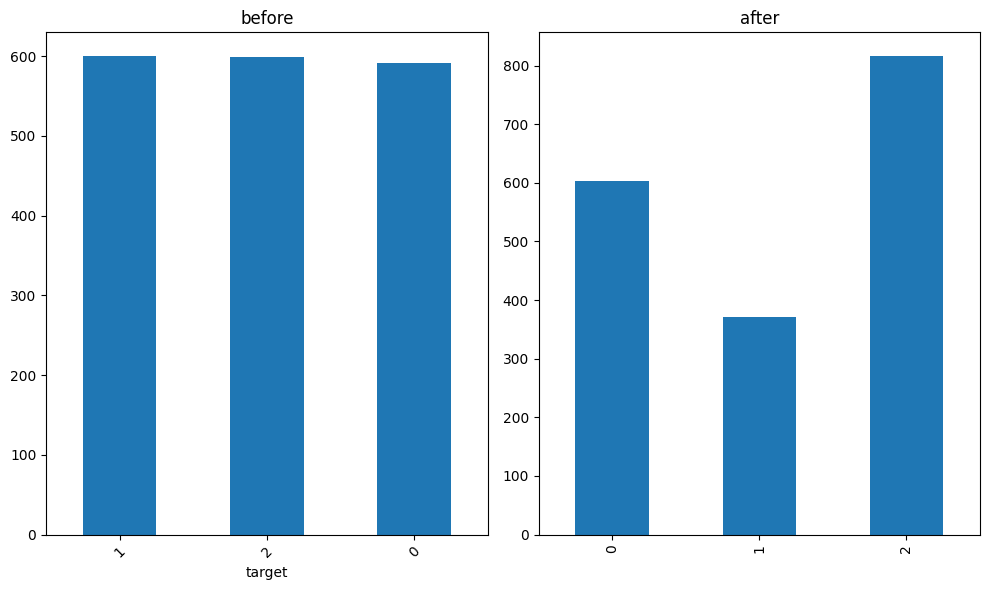

In [69]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', title='before')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
pd.Series(cluster_labels).value_counts().sort_index().plot(kind='bar', title='after')
plt.tight_layout()
plt.show()

In [63]:
# accuracy
kmeans.score(x_tsvd)

-1358.164935846065

عدد النصوص: 1790
توزيع الفئات:
target_names
rec.sport.hockey           600
soc.religion.christian     599
comp.os.ms-windows.misc    591
Name: count, dtype: int64
عدد النصوص بعد التنظيف: 1742
شكل مصفوفة TF-IDF: (1742, 1215)
نسبة التباين المفسر: 0.365

تقييم الأداء:
Adjusted Rand Index: 0.557
Silhouette Score: 0.031

أمثلة من كل مجموعة:

المجموعة 0:
  1: just quick question mary was immaculately concieved she could pure vessel does this mean that she wa...
  2: listowner have sent this anderson privately post only you think general interest here copy something...

المجموعة 1:
  1: good that there isn any diff whether not atmanager turned not worth run atm all especially with thes...
  2: there with megs ram there need run load smartdrv for windows yes can run load ramdrive without smart...

المجموعة 2:
  1: well don see any smileys here trying figure out the poster dog wordprocessor couldn neither both are...
  2: haven heard any news about asn carrying any games but the local cable sta

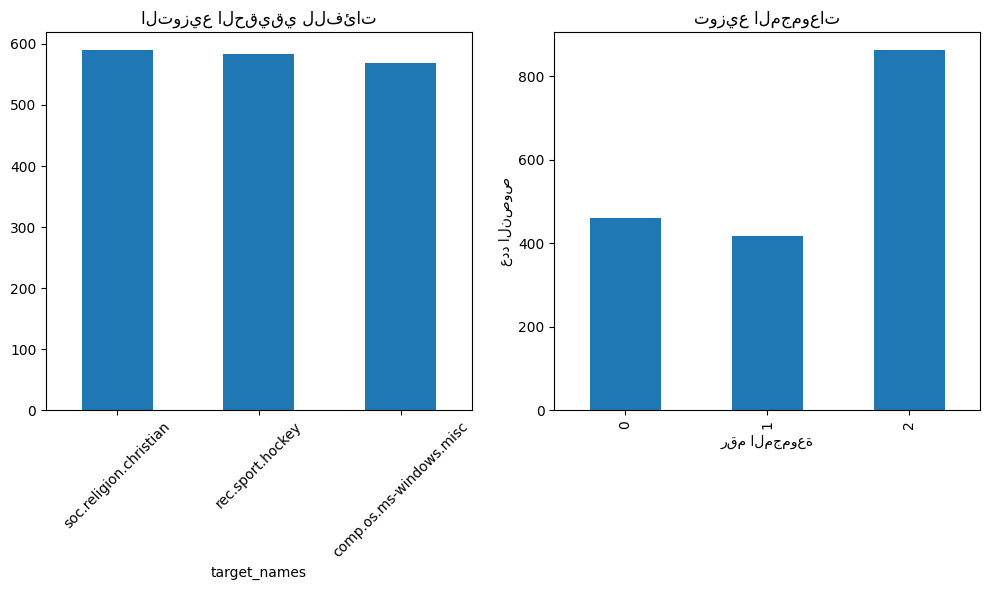


النتائج محفوظة في results_df


In [71]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt

# تحميل البيانات
categories = [
    'comp.os.ms-windows.misc',
    'rec.sport.hockey',
    'soc.religion.christian',
]

dataset = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    remove=('headers', 'footers', 'quotes')
)

# إنشاء DataFrame
data = {'text': dataset.data, 'target': dataset.target, 'target_names': [categories[i] for i in dataset.target]}
df = pd.DataFrame(data)

print(f"عدد النصوص: {len(df)}")
print(f"توزيع الفئات:\n{df['target_names'].value_counts()}")

# تنظيف النصوص المحسن
def preprocess_text(text):
    """تنظيف النصوص مع معالجة أفضل"""
    text = str(text).lower()
    # إزالة الأرقام والرموز الخاصة
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # إزالة المسافات الزائدة
    text = re.sub(r'\s+', ' ', text)
    # إزالة الكلمات القصيرة جداً
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text.strip()

df["clean_text"] = df["text"].apply(preprocess_text)

# إزالة النصوص الفارغة
df = df[df["clean_text"].str.len() > 0].reset_index(drop=True)
print(f"عدد النصوص بعد التنظيف: {len(df)}")

# استخراج الميزات باستخدام TF-IDF
tfidf = TfidfVectorizer(
    max_df=0.7,        # تقليل الكلمات الشائعة جداً
    min_df=0.01,       # تقليل الكلمات النادرة جداً
    ngram_range=(1, 2), # استخدام unigrams و bigrams فقط
    max_features=5000,  # تحديد عدد الميزات
    stop_words='english'
)

X = tfidf.fit_transform(df["clean_text"])
print(f"شكل مصفوفة TF-IDF: {X.shape}")

# تقليل الأبعاد باستخدام SVD
n_components = min(100, X.shape[1])  # تجنب استخدام components أكثر من الميزات المتاحة
tsvd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = tsvd.fit_transform(X)

explained_variance = tsvd.explained_variance_ratio_.sum()
print(f"نسبة التباين المفسر: {explained_variance:.3f}")

# تطبيق K-Means مع عدد العناقيد الصحيح
n_clusters = len(categories)  # استخدام عدد الفئات الحقيقية
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_reduced)

# تقييم الأداء
# مقارنة مع التصنيف الحقيقي
ari_score = adjusted_rand_score(df['target'], cluster_labels)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

print(f"\nتقييم الأداء:")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

# إضافة التصنيف إلى DataFrame
df['cluster'] = cluster_labels

# عرض أمثلة من كل مجموعة
print("\nأمثلة من كل مجموعة:")
for i in range(n_clusters):
    print(f"\nالمجموعة {i}:")
    cluster_texts = df[df['cluster'] == i]['clean_text'].head(2)
    for j, text in enumerate(cluster_texts):
        print(f"  {j+1}: {text[:100]}...")

# تحليل الكلمات المهمة لكل مجموعة
feature_names = tfidf.get_feature_names_out()

def get_top_keywords(cluster_center, feature_names, top_k=10):
    """استخراج الكلمات المهمة لكل مجموعة"""
    # الحصول على مراكز العناقيد في المساحة الأصلية
    center_tfidf = tsvd.inverse_transform(cluster_center.reshape(1, -1))
    top_indices = center_tfidf[0].argsort()[-top_k:][::-1]
    return [feature_names[i] for i in top_indices]

print("\nالكلمات المميزة لكل مجموعة:")
for i, center in enumerate(kmeans.cluster_centers_):
    keywords = get_top_keywords(center, feature_names)
    print(f"المجموعة {i}: {', '.join(keywords)}")

# رسم بياني لتوزيع المجموعات
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['target_names'].value_counts().plot(kind='bar', title='التوزيع الحقيقي للفئات')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
pd.Series(cluster_labels).value_counts().sort_index().plot(kind='bar', title='توزيع المجموعات')
plt.xlabel('رقم المجموعة')
plt.ylabel('عدد النصوص')

plt.tight_layout()
plt.show()

# حفظ النتائج
results_df = df[['target_names', 'cluster', 'clean_text']].copy()
print("\nالنتائج محفوظة في results_df")